1 a)

We know redshift is equal to the wavelength observed minus wavelength emitted divided by the wavelength emitted. $z = (\lambda_o - \lambda_e)/(\lambda_e)$. 
Rearranging: $$z = \lambda_o / \lambda_e -1 $$

For each specific galaxy:
$$z_2 = \frac{\lambda_{o,0}}{\lambda_{e,1}} - 1$$
$$ z_1 = \frac{\lambda_{o,0}}{\lambda_{e,2}} - 1 $$
Where $\lambda_{o,0} = $ wavelength observed by an observer not in galaxy 1 or 2 and $\lambda_{e,n}$ = wavelength emitted by galaxy n.

To get redshift of galaxy 2 in galaxy 1:
$$ z_{2,1}  = \frac{\lambda_{o,1}}{\lambda_{e,2}}-1 $$
Where: $z_{2,1}=$ redshift of galaxy 2 in galaxy 1 and $\lambda_{o,1} = $ wavelength observed by galaxy 1.  
Next, substitute $\lambda_{e,2}$ from $z_2$ into $z_{2,1}$ to get:
$$ z_{2,1} = \frac{\lambda_{o,1}}{\lambda_{o,0}}(z_2+1)-1$$
Since we are finding redshift at galaxy 1, we know $\lambda_{o,1} = \lambda_{e,1}$, the wavelength observed in galaxy 1 is equal to the wavelength emitted in galaxy 1, for a given wavelength. Taking advantage of this equation as well as the above equation for $z_1$, we can substitute and simplify to get:
$$z_{2,1} = \frac{z_2+1}{z_1+1}-1$$

1 b)
Angular diameter distance:
$$ d_a = \frac{r}{1+z} $$
Where r = proper distance, given by the following integral:
$$ r = \int_{0}^{z}\frac{cdz}{H_0\sqrt{\Omega_{m,0}(1+z)^3}} $$


In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as const
from scipy import integrate
import matplotlib.pyplot as plt
from IPython.core.debugger import Tracer
%matplotlib inline
Kpc = u.def_unit('Kpc',u.pc*10**3) #define Kpc
Mpc = u.def_unit('Mpc',u.pc*10**6) #define Mpc
Gyr = u.def_unit('Gyr',u.yr*10**9) #define Gyr

#givens
z1 = 0.5
z2 = 1.6
H_0 = 70 *u.km/(u.s * u.Mpc)

#find redshift from above
z21 = ((z2+1)/(z1+1))-1

#now to integrate and get proper distance:
# Omega_m = 1, can ignore, giving:

def prop_int(z): #integrand for finding r
    p =((1+z)**3)**(1/2)
    return p
def prop(z):
    r = integrate.quad(prop_int,0,z)
    return r
r1 = prop(z1)[0]*(const.c/H_0)
r2 = prop(z2)[0]*(const.c/H_0)
r21 = prop(z21)[0]*(const.c/H_0)

angd_01 =(1/(1+z1))*r1 # ang diam from observer to 1
angd_02 =(1/(1+z2))*r2 # ang diam from observer to 2
angd_12 =(1/(1+z21))*r21# ang diam from 1 to 2

print ('Ang. Diam. Distance to galaxy 1:',angd_01.to(u.Mpc))
print ('Ang. Diam. Distance to galaxy 2:',angd_02.to(u.Mpc))
print ('Ang. Diam. Distance to galaxy 2 from galaxy 1:',angd_12.to(u.Mpc))
print ('Redshift of galaxy 2 from galaxy 1: ',z21)

Ang. Diam. Distance to galaxy 1: 2005.0987111965765 Mpc
Ang. Diam. Distance to galaxy 2: 6523.070420030639 Mpc
Ang. Diam. Distance to galaxy 2 from galaxy 1: 2921.034319000819 Mpc
Redshift of galaxy 2 from galaxy 1:  0.7333333333333334


1c) We know that the angular diameter distance increases to a critical value at z_{crit} = 1.6. Therefore, we expect the angular diameter distance to increase until $z=z_{crit}$, which we see from the above calculations, since $z_2 = z_{crit}$ and $d_{a,1}<d_{a,2}$

We also determined that $z_1 < z_{2,1} < z_2$, so we would then guess that $d_{a,z_1}<d_{a,z_{2,1}}<d_{a,z_2}$, which is confirmed by our above calculations.

2)

To calculate mean number density, let N = # of galaxies (1000) and V = volume of sphere with radius = half mass radius:

mean number density = $\frac{AvgGalaxies}{Volume} = \frac{N}{V} $ and
$ V = \frac{4}{3}\pi r^3 $ where r = $R_{hm}=1.5 Mpc$
$$ $$
Giving:
$$ \frac{1000}{\frac{4}{3}\pi r^3} = \frac{1000}{\frac{4}{3}\pi R_{hm}^3} = \frac{1000}{\frac{4}{3}\pi (1.5)^3}=70.73553(\frac{Galaxies}{Mpc^{-3}})$$ 

We use the given cross section of a galaxy to determine average distance traveled for a collision, $\Sigma = 10^{-3}$Mpc$^2$. 


Imagining a cylinder with cross section = $\Sigma$:
$$V = \Sigma l$$
Setting $V N = 1$ to guarantee 1 collision, where N is mean number density calculated above. Solving for *l*
$$ \Sigma l N = 1$$
$$ l = \frac{1}{\Sigma N}$$
giving us:
$$ l = 14.137166 Mpc$$
To calculate average time, need to divide *l* by the velocity dispersion($\sigma$)= 880$\frac{km}{s}$:
$$ t_{avg} = \frac{l}{\sigma} $$
$$ t_{avg} = 15.7082 Gyrs $$

This gives us $t_{avg}$*>Hubble Time* = 14 Gyrs


Comparing to the collision time for Milky Way and Andromeda:

Let *r* = separation between Milky Way and Andromeda = 700 kpc

Let *v* = velocity of Andromeda towards Milky Way = 120 $\frac{km}{s}$

Giving:
$$ t = \frac{r}{v} = \frac{700}{120}\frac{kpc*s}{km} = 5.7 Gyrs$$

More detailed calculations in the code below:


In [2]:
N = 1000
Rhm = 1.5 * u.Mpc
r = Rhm 
V = (4/3)*np.pi*r**3
mnd = N/V
print ("Mean Number Density = ",mnd)
sigma = 10**(-3)*(u.Mpc)**2
n = mnd
l = 1/(sigma*n)
print ('length per collision = ',l.to(u.Mpc))
v_disp = 880 *(u.km/u.s)
t_avg = l/v_disp
print ('averge time between collisions = ',t_avg.to(u.Gyr))
v_and = 120 * (u.km/u.s)
r_and = 0.7 * u.Mpc
t_and = r_and/v_and
print('Time until MW-Andromeda collision = ',t_and.to(u.Gyr))

Mean Number Density =  70.7355302630646 1 / Mpc3
length per collision =  14.137166941154067 Mpc
averge time between collisions =  15.708195308585159 Gyr
Time until MW-Andromeda collision =  5.703787959759915 Gyr


/home/dm1681/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dm1681/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


On the left, is the lens produced by a point source with beta = 0, in line with the lens.
On the right is the lens produced by a point source with beta = theta_e-1, where theta_e = 63 pixels (beta = 62 px)
The outer ring is the positive theta value and the inner ring is the negative
The dot inside each figure represents the position (beta) of the point source relative to the lens.
For the beta = theta_e-1 case (right), the point source will be lensed directly above and below,
 creating two images above and below a both positive and negative theta values.
The green vertical line shows the distance to the lens from the observer used. (25 Kpc)
The red horizontal line below shows the distance to source used (50 Kpc). The blue line has a slope of 2, 
meaning the distance to the source is twice the distance to the lens.


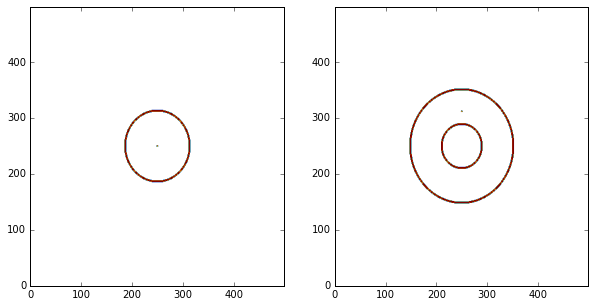

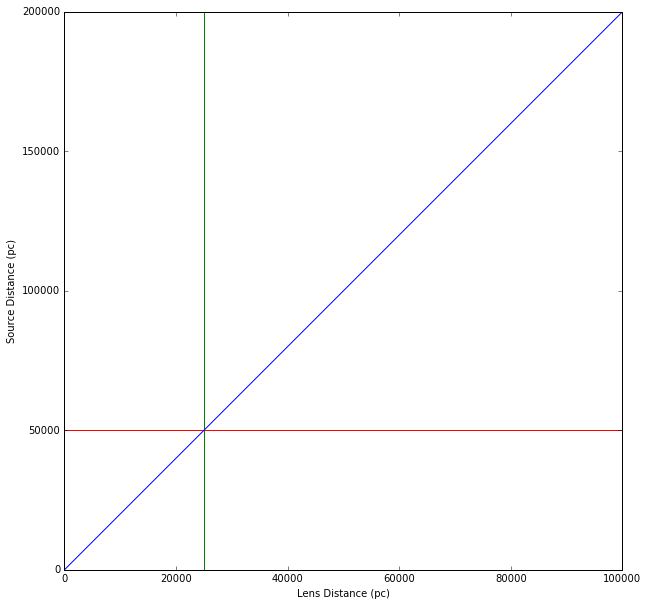

In [10]:
%matplotlib inline
image = np.zeros([500,500])
image2 = np.zeros([500,500])
beta = 62 # for source just inside theta_e case.
bg_src_pos = np.array([image.shape[0]/2,image.shape[1]/2])
image[bg_src_pos[0]][bg_src_pos[1]] = 1 # point sources of 1 at beta = 0
image2[bg_src_pos[0]+beta][bg_src_pos[1]] = 1 # point source of 1 at beta ~~ theta_e
lens_pos = np.array([image.shape[0]/2,image.shape[1]/2])
# set 1 arcsec = 5 px
pix_ang_dist = 1 * u.arcsec / 5


# define theta_e
M = 10**9* const.M_sun
x = 0.5 # distance to lens rel to distance to source
d = 50000 * u.pc # distance to source
d_lens = x * d
theta_e = ((4 * const.G * M * (1-x))/(const.c**2 * d * x))**(1/2)
theta_e = theta_e.decompose()
theta_e = theta_e * u.rad
theta_e = theta_e.to(u.arcsec)
theta_e = theta_e/pix_ang_dist # converts to pixels
#theta_e ~ 63 px



for (y,x),val in np.ndenumerate(image):
    val = image[y][x] # beta = 0, so theta = theta_e
    x_rlens = x - lens_pos[1] #pixels
    y_rlens = y - lens_pos[0] #pixels
    theta = np.sqrt(x_rlens**2 + y_rlens**2) # ang dist from center in pixels
    theta = int(theta)
    if theta == int(theta_e):
        image[y][x] = 1

# new theta's for beta = 62 px
theta_new_p = (beta + np.sqrt(beta**2 + 4*theta_e**2))/2
theta_new_n = (beta - np.sqrt(beta**2 + 4*theta_e**2))/2
theta_new_p = int(theta_new_p) 
theta_new_n = int(theta_new_n) 
# what if beta = 62? theta_e = 63
for (y,x),val in np.ndenumerate(image2):
    val = image[y][x] # beta = 0, so theta = theta_e
    x_rlens = x - lens_pos[1] #pixels
    y_rlens = y - lens_pos[0] #pixels
    theta = np.sqrt(x_rlens**2 + y_rlens**2) # ang dist from center in pixels
    theta = int(theta) # theta_e = 63 pixels
    if theta == theta_new_p or theta == abs(theta_new_n):
        image2[y][x] = 1
        
        
fig,ax = plt.subplots(1,2)
fig.set_size_inches(10,5)

ax[0].contour(image)
ax[1].contour(image2)

print ('On the left, is the lens produced by a point source with beta = 0, in line with the lens.')
print ('On the right is the lens produced by a point source with beta = theta_e-1, where theta_e = 63 pixels (beta = 62 px)')
print ('The outer ring is the positive theta value and the inner ring is the negative')
print ('The dot inside each figure represents the position (beta) of the point source relative to the lens.')
print ('For the beta = theta_e-1 case (right), the point source will be lensed directly above and below,\n creating two images above and below a both positive and negative theta values.')
print ('The green vertical line shows the distance to the lens from the observer used. (25 Kpc)')
print ('The red horizontal line below shows the distance to source used (50 Kpc). The blue line has a slope of 2, \nmeaning the distance to the source is twice the distance to the lens.')


fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
x_ax = np.linspace(0,100000,100000)
y = 2*x_ax
ax.plot(x_ax,y)
ax.set_xlabel('Lens Distance (pc)')
ax.set_ylabel('Source Distance (pc)')
ax.hlines(50000,0,100000,color='r')
ax.vlines(25000,0,200000,color='g')